# Torque 2024 - 1 turbine cases

In [1]:
# stdlib
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

# wcomp
from wcomp import WCompFloris, WCompPyWake, WCompFoxes
from wcomp.plotting import plot_plane

CASE_DIR = Path('cases_torque2024')

## Velocity deficit models

### Jensen

This is the Jensen model as described in the paper:
A note on wind generator interaction (1983)
https://backend.orbit.dtu.dk/ws/portalfiles/portal/55857682/ris_m_2411.pdf

There, the wake width is given as 0.1 on pages 6 and 8.
PyWake has 0.1 as default
FLORIS has 0.05 as default, but it is changed to 0.1 here.
foxes has a set of predefined Jensen wake models available, but you are expected to create your own, as needed. That is done here with k=0.1.

Turbine 0, T0: windio_turbine


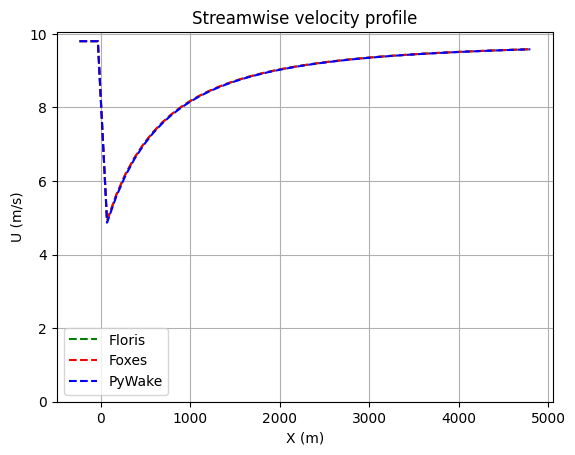

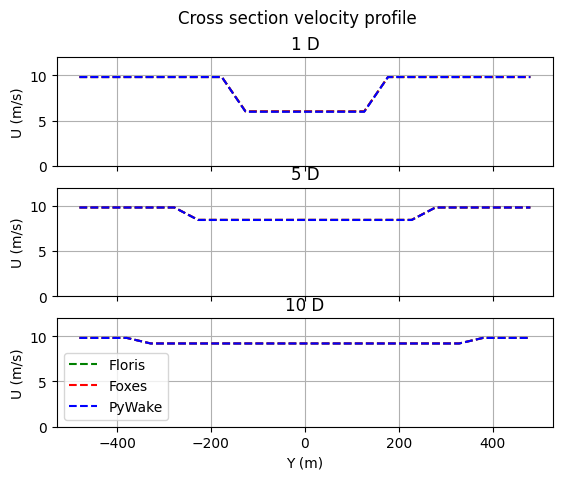

In [2]:
this_case = CASE_DIR / Path('jensen/wind_energy_system.yaml')
floris_1turbine = WCompFloris(this_case)
foxes_1turbine = WCompFoxes(this_case)
pywake_1turbine = WCompPyWake(this_case)

ROTOR_D = floris_1turbine.rotor_diameter

# NOTE: Pywake plotting uses plt.gca -> plt.gcf... get current figure meaning it will add onto the current figure
# fig, ax = plt.subplots(4, 1, figsize=(8,15))

XMIN = -1 * ROTOR_D
XMAX = 20 * ROTOR_D
fig, ax = plt.subplots()
floris_1turbine.streamwise_profile_plot(wind_direction=270, y_coordinate=0.0, xmin=XMIN, xmax=XMAX)
foxes_1turbine.streamwise_profile_plot(wind_direction=270, y_coordinate=0.0, xmin=XMIN, xmax=XMAX)
pywake_1turbine.streamwise_profile_plot(wind_direction=270, y_coordinate=0.0, xmin=XMIN, xmax=XMAX)
ax.set_title("Streamwise velocity profile")
ax.set_xlabel("X (m)")
ax.set_ylabel('U (m/s)')
ax.set_ybound(lower=0.0)
ax.legend()
ax.grid()

YMIN = -2 * ROTOR_D
YMAX =  2 * ROTOR_D

fig, ax = plt.subplots(3, 1)
fig.suptitle("Cross section velocity profile")

X_D = [1, 5, 10]
for i, D_X in enumerate(X_D):
    plt.axes(ax[i])
    floris_1turbine.xsection_profile_plot(wind_direction=270, x_coordinate=D_X * ROTOR_D, ymin=YMIN, ymax=YMAX)
    foxes_1turbine.xsection_profile_plot(wind_direction=270, x_coordinate=D_X * ROTOR_D, ymin=YMIN, ymax=YMAX)
    pywake_1turbine.xsection_profile_plot(wind_direction=270, x_coordinate=D_X * ROTOR_D, ymin=YMIN, ymax=YMAX)
    ax[i].set_title(f"{D_X} D")
    ax[i].set_ylabel("U (m/s)")
    ax[i].set_ybound(lower=0.0, upper=12.0)
    ax[i].grid()
    if i < len(X_D) - 1:
        ax[i].xaxis.set_ticklabels([])
    else:
        ax[i].set_xlabel("Y (m)")
        ax[i].legend()

### Gaussian models: Niayifar / Porte-Agel

For the deficit model, we compare Niayifar / Porte-Afel 2016: https://www.mdpi.com/1996-1073/9/9/741
This model builds on Bastankhah / Porte-Agel 2014: https://www.sciencedirect.com/science/article/abs/pii/S0960148114000317

- FLORIS -> gauss velocity deficit is based on this paper. https://nrel.github.io/floris/wake_models.html#gauss-and-gch
- foxes -> PorteAgelWake is based on this paper. See the docstring for that class
- PyWake -> Niayifar_PorteAgel_2016, self explanatory

In the paper, the parameters are:
k* coefficients that fit the line through the turbulence intensities in equation 15: k* = 0.3837 * I + 0.003678


wake width is given as 0.1 on pages 6 and 8.
PyWake has 0.1 as default
FLORIS has 0.05 as default, but it is changed to 0.1 here.
foxes has a set of predefined Jensen wake models available, but you are expected to create your own, as needed. That is done here with k=0.1.

Turbine 0, T0: windio_turbine


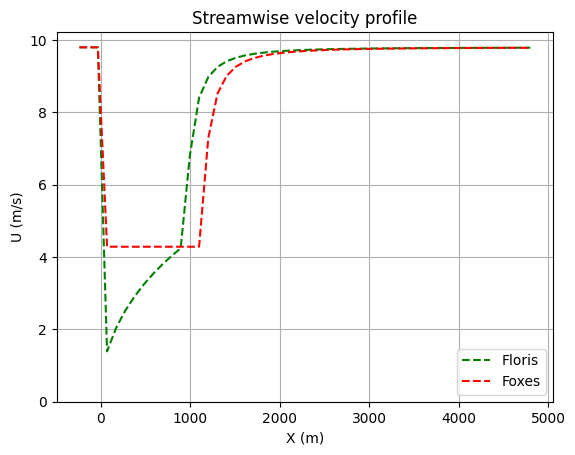

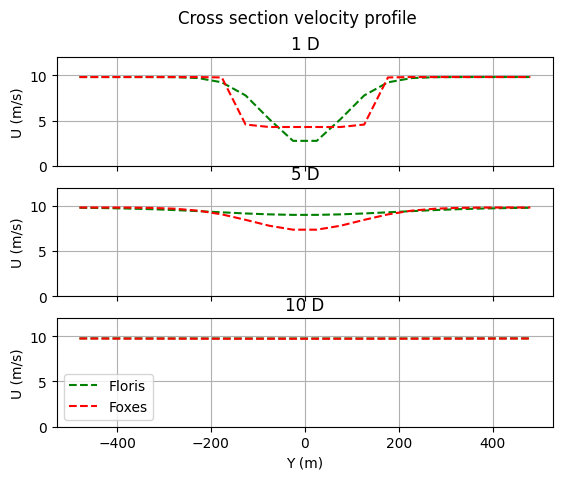

In [3]:
this_case = CASE_DIR / Path('bastankhah/wind_energy_system.yaml')
floris_1turbine = WCompFloris(this_case)
foxes_1turbine = WCompFoxes(this_case)
# pywake_1turbine = WCompPyWake(this_case)

# floris_1turbine = WCompFloris(case_1turbine, "gauss", {"alpha": 0.58, "beta": 0.077, "ka": 0.38, "kb": 0.004})
# foxes_1turbine = WCompFoxes(case_1turbine, PorteAgelWake, {"k": 0.03})
# pywake_1turbine = WCompPyWake(case_1turbine, Niayifar_PorteAgel_2016, {"a": [0.38, 4e-3]})

ROTOR_D = floris_1turbine.rotor_diameter

# NOTE: Pywake plotting uses plt.gca -> plt.gcf... get current figure meaning it will add onto the current figure

XMIN = -1 * ROTOR_D
XMAX = 20 * ROTOR_D
fig, ax = plt.subplots()
floris_1turbine.streamwise_profile_plot(wind_direction=270, y_coordinate=0.0, xmin=XMIN, xmax=XMAX)
foxes_1turbine.streamwise_profile_plot(wind_direction=270, y_coordinate=0.0, xmin=XMIN, xmax=XMAX)
# pywake_1turbine.streamwise_profile_plot(wind_direction=270, y_coordinate=0.0, xmin=XMIN, xmax=XMAX)
ax.set_title("Streamwise velocity profile")
ax.set_xlabel("X (m)")
ax.set_ylabel('U (m/s)')
ax.set_ybound(lower=0.0)
ax.legend()
ax.grid()


YMIN = -2 * ROTOR_D
YMAX =  2 * ROTOR_D

fig, ax = plt.subplots(3, 1)
fig.suptitle("Cross section velocity profile")

X_D = [1, 5, 10]
for i, D_X in enumerate(X_D):
    plt.axes(ax[i])
    floris_1turbine.xsection_profile_plot(wind_direction=270, x_coordinate=D_X * ROTOR_D, ymin=YMIN, ymax=YMAX)
    foxes_1turbine.xsection_profile_plot(wind_direction=270, x_coordinate=D_X * ROTOR_D, ymin=YMIN, ymax=YMAX)
    # pywake_1turbine.xsection_profile_plot(wind_direction=270, x_coordinate=D_X * ROTOR_D, ymin=YMIN, ymax=YMAX)
    ax[i].set_title(f"{D_X} D")
    ax[i].set_ylabel("U (m/s)")
    ax[i].set_ybound(lower=0.0, upper=12.0)
    ax[i].grid()
    if i < len(X_D) - 1:
        ax[i].xaxis.set_ticklabels([])
    else:
        ax[i].set_xlabel("Y (m)")
        ax[i].legend()

### TurbOPark



Turbine 0, T0: windio_turbine


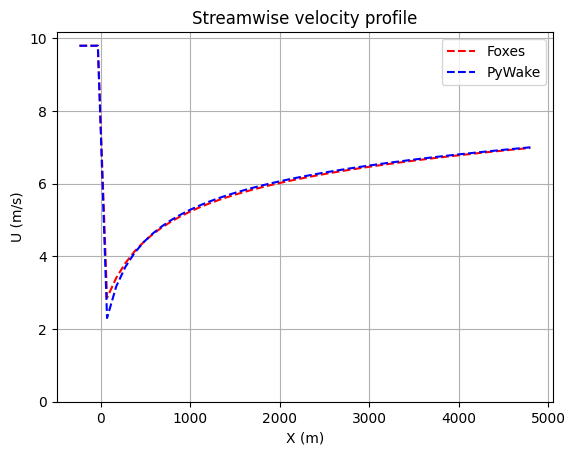

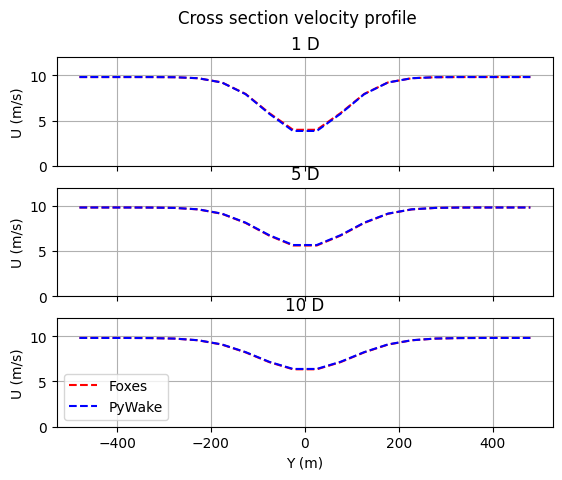

In [4]:
this_case = CASE_DIR / Path('turbopark/wind_energy_system.yaml')
# floris_1turbine = WCompFloris(this_case)
foxes_1turbine = WCompFoxes(this_case)
pywake_1turbine = WCompPyWake(this_case)

ROTOR_D = floris_1turbine.rotor_diameter

# NOTE: Pywake plotting uses plt.gca -> plt.gcf... get current figure meaning it will add onto the current figure

XMIN = -1 * ROTOR_D
XMAX = 20 * ROTOR_D
fig, ax = plt.subplots()
# floris_1turbine.streamwise_profile_plot(wind_direction=270, y_coordinate=0.0, xmin=XMIN, xmax=XMAX)
foxes_1turbine.streamwise_profile_plot(wind_direction=270, y_coordinate=0.0, xmin=XMIN, xmax=XMAX)
pywake_1turbine.streamwise_profile_plot(wind_direction=270, y_coordinate=0.0, xmin=XMIN, xmax=XMAX)
ax.set_title("Streamwise velocity profile")
ax.set_xlabel("X (m)")
ax.set_ylabel('U (m/s)')
ax.set_ybound(lower=0.0)
ax.legend()
ax.grid()


YMIN = -2 * ROTOR_D
YMAX =  2 * ROTOR_D

fig, ax = plt.subplots(3, 1)
fig.suptitle("Cross section velocity profile")

X_D = [1, 5, 10]
for i, D_X in enumerate(X_D):
    plt.axes(ax[i])
    # floris_1turbine.xsection_profile_plot(wind_direction=270, x_coordinate=D_X * ROTOR_D, ymin=YMIN, ymax=YMAX)
    foxes_1turbine.xsection_profile_plot(wind_direction=270, x_coordinate=D_X * ROTOR_D, ymin=YMIN, ymax=YMAX)
    pywake_1turbine.xsection_profile_plot(wind_direction=270, x_coordinate=D_X * ROTOR_D, ymin=YMIN, ymax=YMAX)
    ax[i].set_title(f"{D_X} D")
    ax[i].set_ylabel("U (m/s)")
    ax[i].set_ybound(lower=0.0, upper=12.0)
    ax[i].grid()
    if i < len(X_D) - 1:
        ax[i].xaxis.set_ticklabels([])
    else:
        ax[i].set_xlabel("Y (m)")
        ax[i].legend()

## Wake deflection models

Here we yaw the turbines 12 degrees to activate the wake deflection models.

### Jimenez

Using the Jensen velocity deficit model, we compare the Jimenez deflection models

Paper:
Application of a LES technique to characterize the wake deflection of a wind turbine in yaw
https://onlinelibrary.wiley.com/doi/10.1002/we.380



Turbine 0, T0: windio_turbine


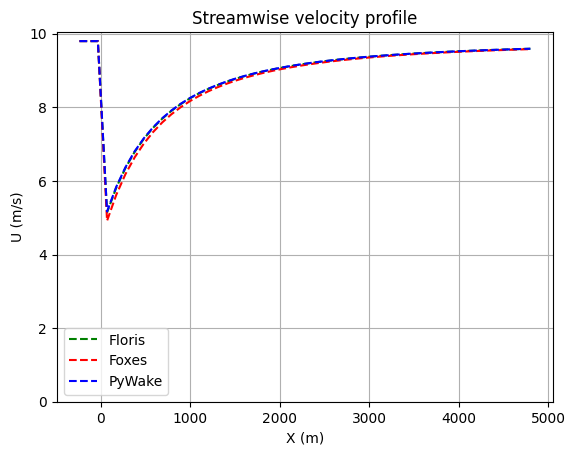

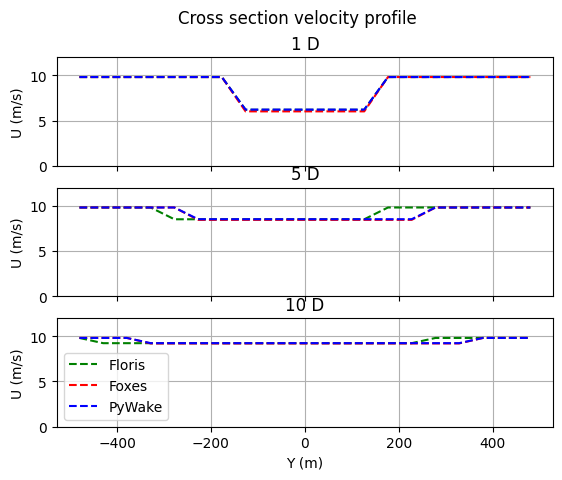

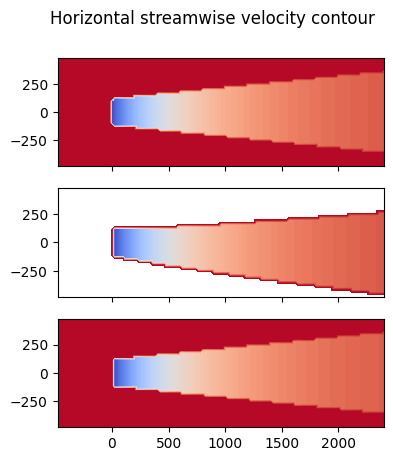

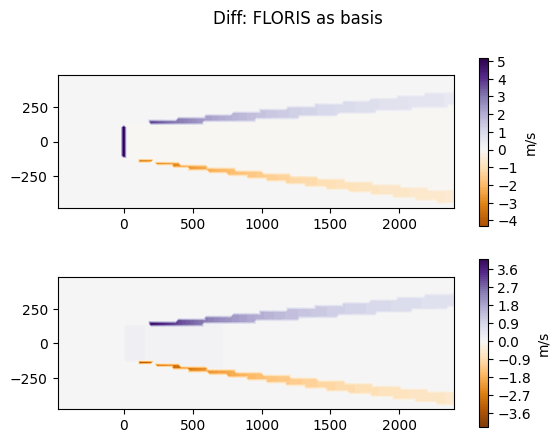

In [5]:
this_case = CASE_DIR / Path('jimenez/wind_energy_system.yaml')
floris_1turbine = WCompFloris(this_case)
foxes_1turbine = WCompFoxes(this_case)
pywake_1turbine = WCompPyWake(this_case)

ROTOR_D = floris_1turbine.rotor_diameter

# NOTE: Pywake plotting uses plt.gca -> plt.gcf... get current figure meaning it will add onto the current figure

XMIN = -1 * ROTOR_D
XMAX = 20 * ROTOR_D
fig, ax = plt.subplots()
floris_1turbine.streamwise_profile_plot(wind_direction=270, y_coordinate=0.0, xmin=XMIN, xmax=XMAX)
foxes_1turbine.streamwise_profile_plot(wind_direction=270, y_coordinate=0.0, xmin=XMIN, xmax=XMAX)
pywake_1turbine.streamwise_profile_plot(wind_direction=270, y_coordinate=0.0, xmin=XMIN, xmax=XMAX)
ax.set_title("Streamwise velocity profile")
ax.set_xlabel("X (m)")
ax.set_ylabel('U (m/s)')
ax.set_ybound(lower=0.0)
ax.legend()
ax.grid()


YMIN = -2 * ROTOR_D
YMAX =  2 * ROTOR_D

fig, ax = plt.subplots(3, 1)
fig.suptitle("Cross section velocity profile")

X_D = [1, 5, 10]
for i, D_X in enumerate(X_D):
    plt.axes(ax[i])
    floris_1turbine.xsection_profile_plot(wind_direction=270, x_coordinate=D_X * ROTOR_D, ymin=YMIN, ymax=YMAX)
    foxes_1turbine.xsection_profile_plot(wind_direction=270, x_coordinate=D_X * ROTOR_D, ymin=YMIN, ymax=YMAX)
    pywake_1turbine.xsection_profile_plot(wind_direction=270, x_coordinate=D_X * ROTOR_D, ymin=YMIN, ymax=YMAX)
    ax[i].set_title(f"{D_X} D")
    ax[i].set_ylabel("U (m/s)")
    ax[i].set_ybound(lower=0.0, upper=12.0)
    ax[i].grid()
    if i < len(X_D) - 1:
        ax[i].xaxis.set_ticklabels([])
    else:
        ax[i].set_xlabel("Y (m)")
        ax[i].legend()


fig, ax = plt.subplots(3, 1)
fig.suptitle("Horizontal streamwise velocity contour")

resolution = 20

plt.axes(ax[0])
ax[0].xaxis.set_ticklabels([])
pywake_plane = pywake_1turbine.horizontal_contour(wind_direction=270, resolution=resolution)

plt.axes(ax[1])
ax[1].xaxis.set_ticklabels([])
floris_plane = floris_1turbine.horizontal_contour(wind_direction=270, resolution=resolution)

plt.axes(ax[2])
ax[1].xaxis.set_ticklabels([])
foxes_plane = foxes_1turbine.horizontal_contour(wind_direction=270, resolution=resolution)


fig, ax = plt.subplots(2, 1)
fig.suptitle("Diff: FLORIS as basis")

plt.axes(ax[0])
diff = floris_plane - pywake_plane
abs_diff = np.abs(diff.values)
min_speed = -1 * np.max(abs_diff)
max_speed = np.max(abs_diff)
plot_plane(
    diff,
    ax=ax[0],
    min_speed=min_speed,
    max_speed=max_speed,
    cmap='PuOr',
    clevels=100,
    color_bar=True,
    title="FLORIS - PyWake"
)

plt.axes(ax[1])
diff = floris_plane - foxes_plane
abs_diff = np.abs(diff.values)
min_speed = -1 * np.max(abs_diff)
max_speed = np.max(abs_diff)
plot_plane(
    diff,
    ax=ax[1],
    min_speed=min_speed,
    max_speed=max_speed,
    cmap='PuOr',
    clevels=100,
    color_bar=True,
    title="FLORIS - foxes"
)

### Gaussian: Bastankhah / Porte-Agel

For the deflection model, we compare Bastankah / Porte-Agel 2015
https://www.cambridge.org/core/journals/journal-of-fluid-mechanics/article/experimental-and-theoretical-study-of-wind-turbine-wakes-in-yawed-conditions/400859134E38F340C8811FD7AAD0CE05



Turbine 0, T0: windio_turbine


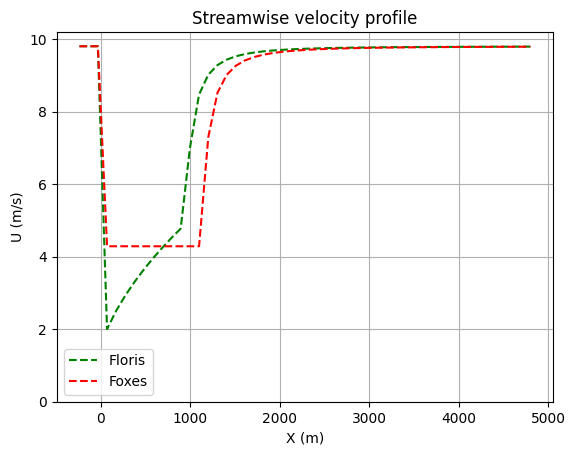

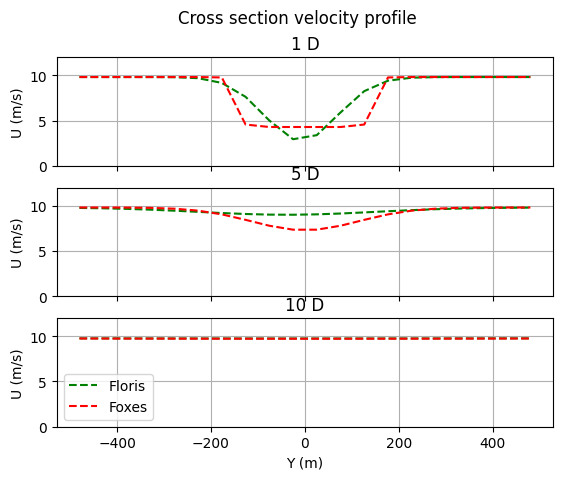

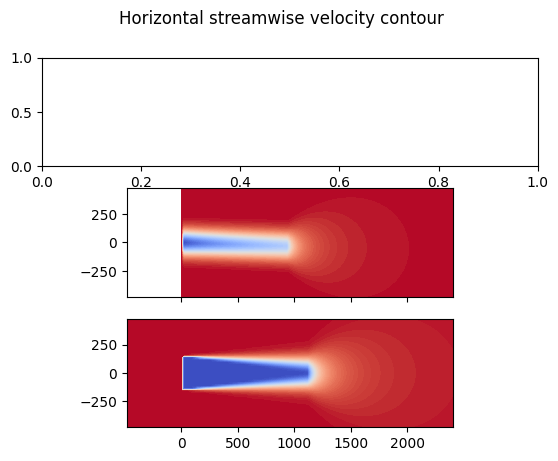

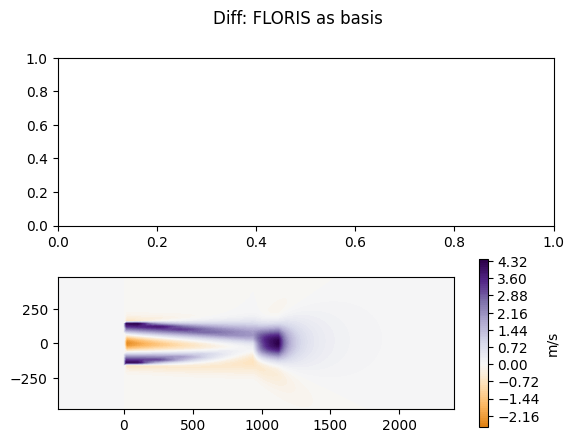

In [6]:
this_case = CASE_DIR / Path('bastankhah_deflection/wind_energy_system.yaml')
floris_1turbine = WCompFloris(this_case)
foxes_1turbine = WCompFoxes(this_case)
# pywake_1turbine = WCompPyWake(this_case)

ROTOR_D = floris_1turbine.rotor_diameter

XMIN = -1 * ROTOR_D
XMAX = 20 * ROTOR_D
fig, ax = plt.subplots()
floris_1turbine.streamwise_profile_plot(wind_direction=270, y_coordinate=0.0, xmin=XMIN, xmax=XMAX)
foxes_1turbine.streamwise_profile_plot(wind_direction=270, y_coordinate=0.0, xmin=XMIN, xmax=XMAX)
# pywake_1turbine.streamwise_profile_plot(wind_direction=270, y_coordinate=0.0, xmin=XMIN, xmax=XMAX)
ax.set_title("Streamwise velocity profile")
ax.set_xlabel("X (m)")
ax.set_ylabel('U (m/s)')
ax.set_ybound(lower=0.0)
ax.legend()
ax.grid()


YMIN = -2 * ROTOR_D
YMAX =  2 * ROTOR_D

fig, ax = plt.subplots(3, 1)
fig.suptitle("Cross section velocity profile")

X_D = [1, 5, 10]
for i, D_X in enumerate(X_D):
    plt.axes(ax[i])
    floris_1turbine.xsection_profile_plot(wind_direction=270, x_coordinate=D_X * ROTOR_D, ymin=YMIN, ymax=YMAX)
    foxes_1turbine.xsection_profile_plot(wind_direction=270, x_coordinate=D_X * ROTOR_D, ymin=YMIN, ymax=YMAX)
    # pywake_1turbine.xsection_profile_plot(wind_direction=270, x_coordinate=D_X * ROTOR_D, ymin=YMIN, ymax=YMAX)
    ax[i].set_title(f"{D_X} D")
    ax[i].set_ylabel("U (m/s)")
    ax[i].set_ybound(lower=0.0, upper=12.0)
    ax[i].grid()
    if i < len(X_D) - 1:
        ax[i].xaxis.set_ticklabels([])
    else:
        ax[i].set_xlabel("Y (m)")
        ax[i].legend()

resolution = 10


fig, ax = plt.subplots(3, 1)
fig.suptitle("Horizontal streamwise velocity contour")

resolution = 20

plt.axes(ax[0])
# ax[0].xaxis.set_ticklabels([])
# pywake_plane = pywake_1turbine.horizontal_contour(wind_direction=270, resolution=resolution)

plt.axes(ax[1])
ax[1].xaxis.set_ticklabels([])
floris_plane = floris_1turbine.horizontal_contour(wind_direction=270, resolution=resolution)

plt.axes(ax[2])
ax[1].xaxis.set_ticklabels([])
foxes_plane = foxes_1turbine.horizontal_contour(wind_direction=270, resolution=resolution)


fig, ax = plt.subplots(2, 1)
fig.suptitle("Diff: FLORIS as basis")

plt.axes(ax[0])
# diff = floris_plane - pywake_plane
# abs_diff = np.abs(diff.values)
# min_speed = -1 * np.max(abs_diff)
# max_speed = np.max(abs_diff)
# plot_plane(
#     diff,
#     ax=ax[0],
#     min_speed=min_speed,
#     max_speed=max_speed,
#     cmap='PuOr',
#     clevels=100,
#     color_bar=True,
#     title="FLORIS - PyWake"
# )

plt.axes(ax[1])
diff = floris_plane - foxes_plane
abs_diff = np.abs(diff.values)
min_speed = -1 * np.max(abs_diff)
max_speed = np.max(abs_diff)
plot_plane(
    diff,
    ax=ax[1],
    min_speed=min_speed,
    max_speed=max_speed,
    cmap='PuOr',
    clevels=100,
    color_bar=True,
    title="FLORIS - foxes"
)